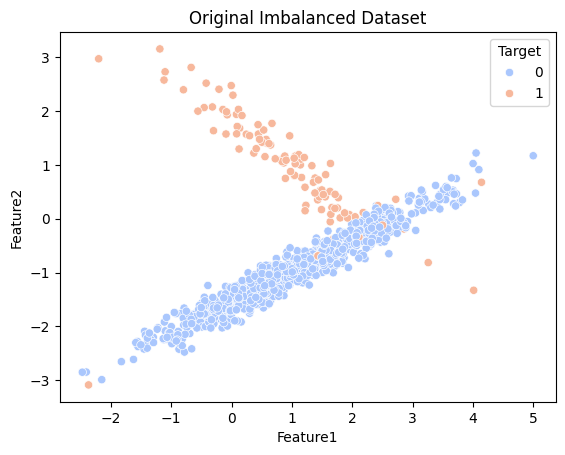

Class distribution before balancing:
Target
0    895
1    105
Name: count, dtype: int64


In [11]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns

# Create an imbalanced dataset
X, y = make_classification(
    n_samples=1000, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1, 
    weights=[0.9, 0.1], 
    random_state=42,
    n_redundant=0,
    n_repeated=0,
    n_informative=2
)

# Convert to DataFrame for easy visualization
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
df['Target'] = y

# Visualize the original data
sns.scatterplot(data=df, x='Feature1', y='Feature2', hue='Target', palette='coolwarm')
plt.title('Original Imbalanced Dataset')
plt.show()

# Check class distribution
print("Class distribution before balancing:")
print(df['Target'].value_counts())


In [2]:
!pip install imblearn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report for Imbalanced Data:")
print(classification_report(y_test, y_pred))


# Concatenate training data back together
train_data = pd.concat([pd.DataFrame(X_train, columns=['Feature1', 'Feature2']), pd.DataFrame(y_train, columns=['Target'])], axis=1)

# Separate minority and majority classes
majority = train_data[train_data['Target'] == 0]
minority = train_data[train_data['Target'] == 1]

# Upsample the minority class
minority_upsampled = resample(minority, 
                              replace=True,   # Sample with replacement
                              n_samples=len(majority), # Match majority class size
                              random_state=42)

# Combine majority class with upsampled minority class
upsampled = pd.concat([majority, minority_upsampled])

# Check new class distribution
print("Class distribution after upsampling:")
print(upsampled['Target'].value_counts())

# Train a model on the upsampled data
X_train_upsampled = upsampled.drop('Target', axis=1)
y_train_upsampled = upsampled['Target']
model.fit(X_train_upsampled, y_train_upsampled)

# Evaluate the model
y_pred_upsampled = model.predict(X_test)
print("Classification Report for Upsampled Data:")
print(classification_report(y_test, y_pred_upsampled))


NameError: name 'X_train' is not defined